<a href="https://colab.research.google.com/github/d1m3j1/Machine-Learning/blob/main/MNIST_Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install Tensor Flow
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
#Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train.shape:', x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
#Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(10, activation='softmax')
])



In [4]:
#Compile the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [5]:
#Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4848 - accuracy: 0.8590 - val_loss: 0.1441 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1536 - accuracy: 0.9547 - val_loss: 0.1035 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1128 - accuracy: 0.9659 - val_loss: 0.0837 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0882 - accuracy: 0.9723 - val_loss: 0.0791 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0709 - accuracy: 0.9782 - val_loss: 0.0748 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0662 - accuracy: 0.9794 - val_loss: 0.0771 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0728 - val_accuracy:

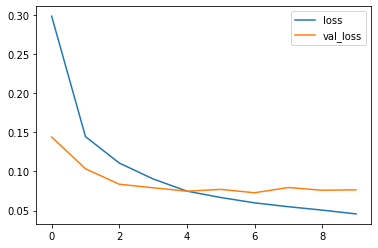

In [6]:
#plot loss per iteration
plt.plot(r.history['loss'], label = 'loss'),
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

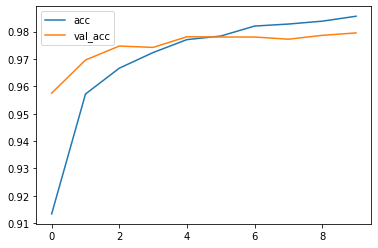

In [7]:
#Plot of the Accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc'),
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 972    0    2    2    1    0    1    1    1    0]
 [   0 1125    3    1    0    1    2    0    3    0]
 [   4    1 1018    1    1    0    1    3    3    0]
 [   0    0    2  995    0    5    0    3    2    3]
 [   2    0    1    0  960    0    5    3    0   11]
 [   2    0    0    9    1  877    1    0    1    1]
 [   7    3    2    2    5    8  930    0    1    0]
 [   1    6   10    4    1    0    0  994    2   10]
 [   4    0    4    5    4    7    2    4  938    6]
 [   1    2    0    5   10    1    0    4    0  986]]


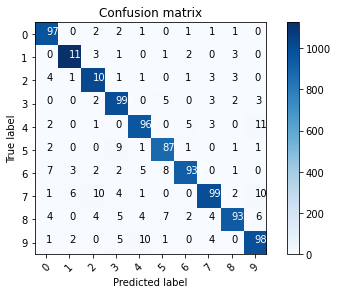

In [8]:
#Plot Confusion Matrix
def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize: 
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            color = 'white' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 7 Predicted: 9')

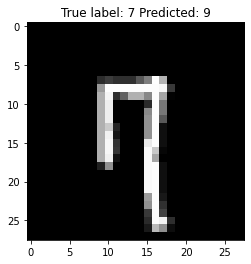

In [9]:
#Show misclassified example
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' %(y_test[i], p_test[i]))